# Data Scientist Screening Exercise

## Data
This repository's [model_outcome.csv](https://github.com/screening-lacare/data_scientist_screening/blob/master/model_outcome.csv) file contains the ficticious results of a classification model. The three fields included in the file are:
- `index` : The unique ID of each observation.
- `class` : The true class of each observation. The classes are binary (0 or 1).
- `predicted_prob` : The model's estimate of probability that the observation belongs to `class` 1. 

## Instructions
Using the [model_outcome.csv](https://github.com/screening-lacare/data_scientist_screening/blob/master/model_outcome.csv), develop either an R or Python script to:
1. _*Manually*_ calculate the sensitivity and specificity of the model, using a `predicted_prob` threshold of greater than or equal to .5. 
2. _*Manually*_ calculate the Area Under the Receiver Operating Characteristic Curve.
3. Visualize the Receiver Operating Characterstic Curve.
4. Email your finalized, completely reproducible .r or .py script to L.A. Care's Talent Acquisition Specialist, Jamessa Jones, at jjones@lacare.org.

## Assessment
In addition to formulating the correct outputs for the above-mentioned requirements, the applicant's script will be assessed on:
- Coding Style
- Commenting Effectiveness

***

# 1. Load Data

* Load `model_outcome.csv` into Pandas dataframe and check the results using `.head()`, `.info()`, and `.describe()`.

In [1]:
import pandas as pd

df = pd.read_csv('model_outcome.csv')
df.head()

,index,class,predicted_prob
0,1,0,0.592837
1,2,1,0.624829
2,3,0,0.073848
3,4,1,0.544891
4,5,0,0.015118


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
index             1000 non-null int64
class             1000 non-null int64
predicted_prob    1000 non-null float64
dtypes: float64(1), int64(2)
memory usage: 23.5 KB


From above summary, we know that
* There are 1000 rows and 3 columns in dataframe.
* No missing values.

In [3]:
df.describe()

,index,class,predicted_prob
count,1000.000000,1000.000000,1000.000000
mean,500.500000,0.492000,0.510150
std,288.819436,0.500186,0.263700
min,1.000000,0.000000,0.000967
25%,250.750000,0.000000,0.313266
50%,500.500000,0.000000,0.515382
75%,750.250000,1.000000,0.702314
max,1000.000000,1.000000,0.994258


Use the index column as new index in the dataframe.

In [4]:
df.set_index('index', inplace=True)
df.head()

,class,predicted_prob
index,,
1,0,0.592837
2,1,0.624829
3,0,0.073848
4,1,0.544891
5,0,0.015118


# 2. Calculate sensitivity and specificity of the model

![confusion matrix](https://cdn-images-1.medium.com/max/1600/1*-BkpqhN-5fPicMifDQ0SwA.png)

* Sensitivity is the true positive rate
![TPR](https://wikimedia.org/api/rest_v1/media/math/render/svg/73004d7856898ebe0bb1d1acd9e87b4be39b91a2)
* Specificity is the true negative rate
![TNR](https://wikimedia.org/api/rest_v1/media/math/render/svg/67c35d27c765b463c514f44b0c654b30f4a1afb0)

We need to calculate P, N, TP, and TN in the input data, then we can get TPR and TNR respectively.

In [5]:
def calculate_sensitivity_and_specificity(df, threshold):
    P, N, TP, TN, FP, FN = 0, 0, 0, 0, 0, 0

    for index, row in df.iterrows():
        if row['class'] == 1: # Ground Truth Positive
            P += 1
            if row['predicted_prob'] >= threshold: # Predicted Positive
                TP += 1
            else: # Predicted Negative
                FN += 1
        else: # Ground Truth Negative
            N += 1
            if row['predicted_prob'] < threshold: # Predicted Negative
                TN += 1
            else: # Predicted Positive
                FP += 1
#     print(P, N, TP, TN, FP, FN)

    tpr = TP/P
    tnr = TN/N
    
    return tpr, tnr

In [6]:
tpr, tnr = calculate_sensitivity_and_specificity(df, 0.5)
print('Sensitivity (TPR) = %.4f, specificity (TNR) = %.4f' % (tpr, tnr))

Sensitivity (TPR) = 0.8171, specificity (TNR) = 0.7579


# 3. Calculate AUC.

In [7]:
import numpy as np

def calculate_auc(df):
    # Sort df by the predicted_prob column using descending order
    df_sorted = df.sort_values(by='predicted_prob', ascending=False)
    
    y_true = df_sorted['class'].values
    y_score = df_sorted['predicted_prob'].values

    index = np.arange(len(y_score))
    
    # Calculate the true positives and false positives
    tps = np.cumsum(y_true)
    fps = (index + 1) - tps

    # Calculate the true positive rates and false positives
    tpr = tps / tps[-1]
    fpr = fps / fps[-1]

    area = np.trapz(tpr, fpr)
    
    return fpr, tpr, area

In [8]:
# df = pd.read_csv('model_outcome.csv')
fpr, tpr, area = calculate_auc(df)
print('AUC = %.4f' % area)

AUC = 0.8887


# 4. Visualize ROC

ROC curve uses fpr as X-axis and tpr as Y-axis.

In [9]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, area):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC curve (area = %0.4f)' % area)
    plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

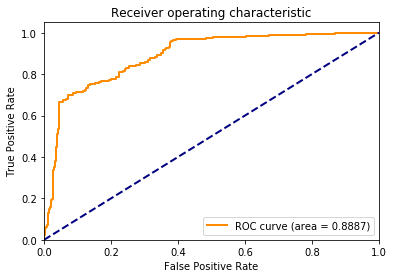

In [10]:
plot_roc_curve(fpr, tpr, area)